In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
import matplotlib.pyplot as plt
%matplotlib inline
import os
from os import getcwd
import csv
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import numpy as np
import csv
import pandas as pd

In [2]:
def get_data(filename):
    with open(filename) as training_file:
        reader = csv.reader(training_file, delimiter=',')    
        imgs = []
        labels = []

        next(reader, None)
        
        for row in reader:
            label = row[0]
            data = row[1:]
            img = np.array(data).reshape((28, 28))

            imgs.append(img)
            labels.append(label)

        images = np.array(imgs).astype(float)
        labels = np.array(labels).astype(float)
    return images, labels

In [3]:
path_sign_mnist_train = f"{getcwd()}/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

In [4]:
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [5]:
#expanding to dimension to make it like (27355,28,28,1)
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)


In [6]:
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28, 1)
(27455,)
(7172, 28, 28, 1)
(7172,)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(training_images, training_labels, test_size = 0.2, random_state = 11111)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)

(21964, 28, 28, 1)
(21964,)
(5491, 28, 28, 1)


In [9]:
#Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1 / 255)
    

In [10]:
model =models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(26, activation='softmax')])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

In [12]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

train_gen = train_datagen.flow(
    X_train,
    y_train,
    batch_size=256)

val_gen = validation_datagen.flow(
    X_validate,
    y_validate,
    batch_size=256)

In [13]:
history = model.fit_generator(train_gen,epochs=50,
                              validation_data= val_gen)

model.evaluate(X_validate, y_validate, verbose=0)  #verbose indicates progress bar

Epoch 1/50
86/86 [==============================] - 12s 138ms/step - loss: 3.0204 - accuracy: 0.0995 - val_loss: 2.3167 - val_accuracy: 0.3477
Epoch 2/50
86/86 [==============================] - 8s 96ms/step - loss: 2.2767 - accuracy: 0.2993 - val_loss: 1.4452 - val_accuracy: 0.6019
Epoch 3/50
86/86 [==============================] - 9s 101ms/step - loss: 1.7917 - accuracy: 0.4389 - val_loss: 1.0604 - val_accuracy: 0.6875
Epoch 4/50
86/86 [==============================] - 9s 103ms/step - loss: 1.4388 - accuracy: 0.5356 - val_loss: 0.7273 - val_accuracy: 0.7999
Epoch 5/50
86/86 [==============================] - 8s 96ms/step - loss: 1.2021 - accuracy: 0.6097 - val_loss: 0.5281 - val_accuracy: 0.8590
Epoch 6/50
86/86 [==============================] - 8s 99ms/step - loss: 1.0259 - accuracy: 0.6613 - val_loss: 0.4504 - val_accuracy: 0.8771
Epoch 7/50
86/86 [==============================] - 8s 98ms/step - loss: 0.8979 - accuracy: 0.6980 - val_loss: 0.3705 - val_accuracy: 0.9000
Epoch 8/5

[1.9240038428252277, 0.9899836]

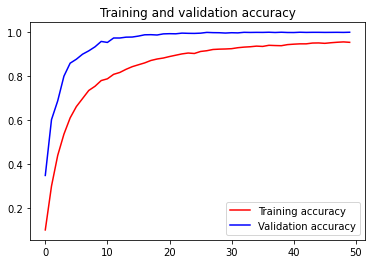

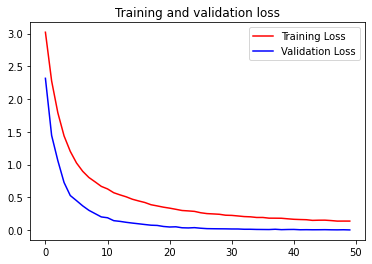

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
predicted_classes = model.predict_classes(testing_images)

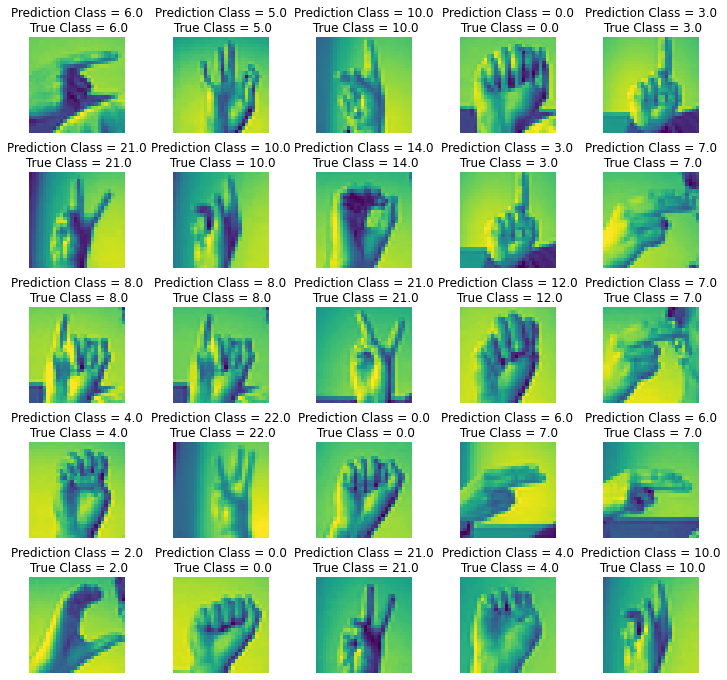

In [16]:
Len = 5
Width = 5
fig, axes = plt.subplots(Len, Width, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, Len * Width):  
    axes[i].imshow(testing_images[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n True Class = {testing_labels[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [17]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(testing_labels, predicted_classes)
print('Accuracy Score = ',acc_score)

Accuracy Score =  0.9730897936419409


In [24]:
from PIL import Image
import numpy
img = Image.open('c.png')
image=img.resize((28,28))
image=numpy.asarray(image)/255
image = numpy.mean(image, axis=2)
image = numpy.expand_dims(image, axis=2)
image = numpy.expand_dims(image, axis=0)
#print(image.shape)
model.predict_classes(image)

array([15], dtype=int64)

In [27]:
from tensorflow.keras.models import model_from_json
model_json = model.to_json()
with open("sld.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("sld.h5")
print("Saved model to disk")

Saved model to disk
